In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [5]:
data = pd.read_csv('/content/Housing (1).csv')
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# Check shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")



Dataset contains 545 rows and 13 columns.


In [8]:


# Summary of the dataset
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [9]:


# Check for missing values
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [12]:
# Handling missing values
data = data.dropna()

In [13]:
# Encoding categorical variables using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()

In [17]:
 #Example: encoding the 'Furnishing Status' column
data['furnishingstatus'] = label_encoder.fit_transform(data['furnishingstatus'])


In [18]:
# Applying the same to other categorical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [19]:
# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [21]:
# Defining the feature set (X) and the target (y)
X = data.drop('price', axis=1)
y = data['price']


In [22]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} rows, Testing set: {X_test.shape[0]} rows")


Training set: 436 rows, Testing set: 109 rows


In [23]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [24]:
# Making predictions on the test set
y_pred = model.predict(X_test)


In [25]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


Mean Absolute Error (MAE): 979679.69
Mean Squared Error (MSE): 1771751116594.04
R-squared (R²) Score: 0.65


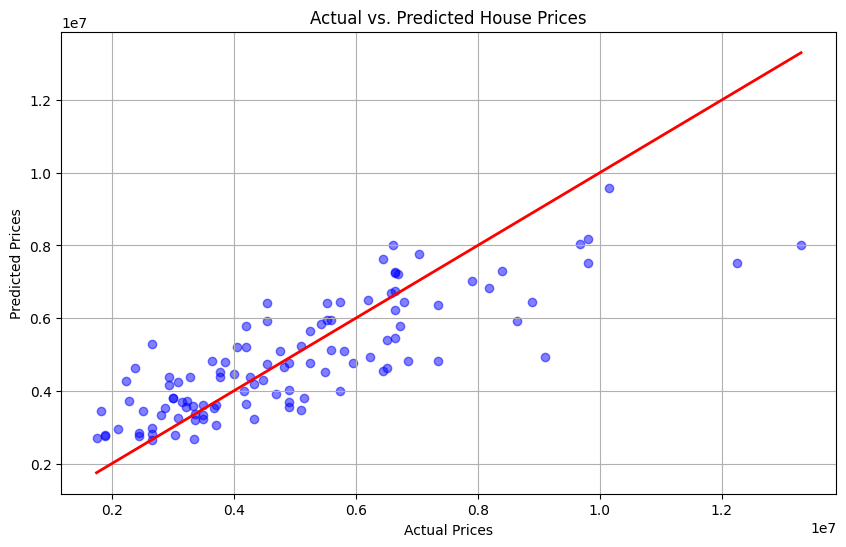

In [26]:
# Scatter plot for Actual vs. Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()
